In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [4]:
f = r"D:\Subash_NextCloud\Desktop\Nepal-Homes-master\cleaned_data.csv"
df = pd.read_csv(f)
df.shape

(1011, 18)

In [5]:
df.columns

Index(['slug_url', 'title', 'built_year', 'is_featured', 'is_premium',
       'floors', 'bedroom', 'bathroom', 'is_price_on_call', 'price_type',
       'road_access', 'property_face', 'state', 'district', 'city', 'area',
       'area_sq_ft', 'amount'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   slug_url          1011 non-null   object 
 1   title             1011 non-null   object 
 2   built_year        122 non-null    float64
 3   is_featured       1011 non-null   bool   
 4   is_premium        1011 non-null   bool   
 5   floors            859 non-null    float64
 6   bedroom           650 non-null    float64
 7   bathroom          605 non-null    float64
 8   is_price_on_call  968 non-null    object 
 9   price_type        1011 non-null   object 
 10  road_access       877 non-null    float64
 11  property_face     487 non-null    object 
 12  state             1010 non-null   object 
 13  district          1010 non-null   object 
 14  city              1010 non-null   object 
 15  area              1010 non-null   object 
 16  area_sq_ft        976 non-null    float64


In [7]:
df.bedroom = df.bedroom.convert_dtypes().apply(lambda x: np.nan if str(x) == "<NA>" else int(x))
df.bathroom = df.bathroom.convert_dtypes().apply(lambda x: np.nan if str(x) == "<NA>" else int(x))

In [8]:
df.head()

,slug_url,title,built_year,is_featured,is_premium,floors,bedroom,bathroom,is_price_on_call,price_type,road_access,property_face,state,district,city,area,area_sq_ft,amount
0,land-with-house-for-sale-in-ravi-bhawan,Land with house for sale in Ravi Bhawan,1998.0,False,False,2.5,5.0,5.0,False,Per Aana,20.0,NaN,Bagmati State,Kathmandu,Kathmandu Metropolitan City,Rabi Bhawan,19166.00,2.800000e+08
1,house-on-sale-in-land-price-in-saibaba-marga-b...,"House on sale in land price in Saibaba Marga, ...",NaN,False,False,1.0,NaN,NaN,False,Per Aana,22.0,East,Bagmati State,Kathmandu,Kathmandu Metropolitan City,Banasthali,3336.93,6.337486e+07
2,land-on-sale-with-free-house-in-thulobharyang,Land on sale with free house in Thulobharyang,NaN,False,False,1.0,3.0,1.0,False,Per Aana,12.0,East,Bagmati State,Kathmandu,Nagarjun Municipality,Thulobharyang,1005.35,1.909357e+07
3,house-on-sale-in-swoyambhu-in-land-price,House on sale in Swoyambhu in land price,NaN,False,False,2.5,6.0,3.0,False,Per Aana,22.0,East,Bagmati State,Kathmandu,Nagarjun Municipality,Swoyambhu,4363.68,7.904986e+07
4,bungalow-for-sale-at-syuchatar,Bungalow for sale at Syuchatar,NaN,False,False,2.5,4.0,5.0,False,Per Aana,12.0,NaN,Bagmati State,Kathmandu,Nagarjun Municipality,Syuchatar,22588.50,2.310000e+08


In [9]:
df.describe()

,built_year,floors,bedroom,bathroom,road_access,area_sq_ft,amount
count,122.000000,859.000000,650.000000,605.000000,877.000000,976.000000,9.440000e+02
mean,2058.581967,2.621071,5.235385,4.061157,15.403193,2586.883122,4.304260e+07
std,26.689472,0.748665,3.337462,3.322295,4.673494,4969.454220,5.053537e+07
min,1990.000000,1.000000,1.000000,1.000000,5.000000,256.680000,5.500000e+06
25%,2060.500000,2.500000,4.000000,3.000000,13.000000,1197.870000,2.140000e+07
50%,2072.000000,2.500000,5.000000,4.000000,14.000000,1540.120000,2.800000e+07
75%,2076.000000,2.500000,6.000000,5.000000,18.000000,2139.060000,4.350000e+07
max,2077.000000,8.500000,54.000000,56.000000,66.000000,109520.000000,9.200000e+08


## Duplicate rows

In [10]:
df.duplicated().sum()

0

## Missing Values

In [11]:
df.isna().sum()

slug_url              0
title                 0
built_year          889
is_featured           0
is_premium            0
floors              152
bedroom             361
bathroom            406
is_price_on_call     43
price_type            0
road_access         134
property_face       524
state                 1
district              1
city                  1
area                  1
area_sq_ft           35
amount               67
dtype: int64

<AxesSubplot: >

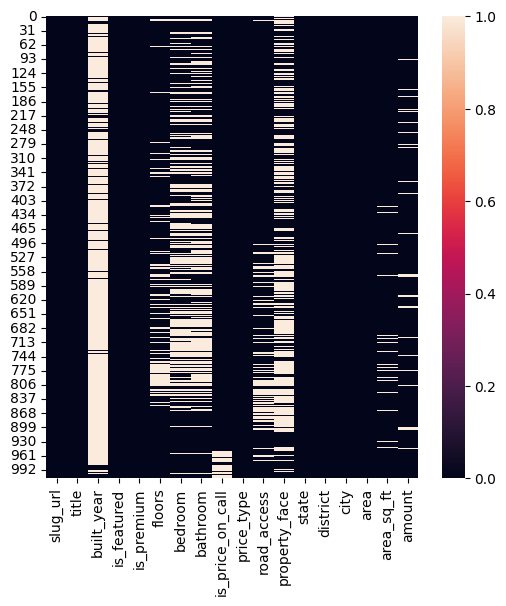

In [12]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isna())

1. Built year has many missing values
2. Missing values of bedroom and bathroom are related

# Relation of missing values with the prices

In [13]:
df.isna().sum()/ df.shape[0] * 100

slug_url             0.000000
title                0.000000
built_year          87.932740
is_featured          0.000000
is_premium           0.000000
floors              15.034619
bedroom             35.707221
bathroom            40.158259
is_price_on_call     4.253215
price_type           0.000000
road_access         13.254204
property_face       51.829871
state                0.098912
district             0.098912
city                 0.098912
area                 0.098912
area_sq_ft           3.461919
amount               6.627102
dtype: float64

In [14]:
missing_df = df.isna()

Text(0.5, 1.0, 'Proportion of missing values')

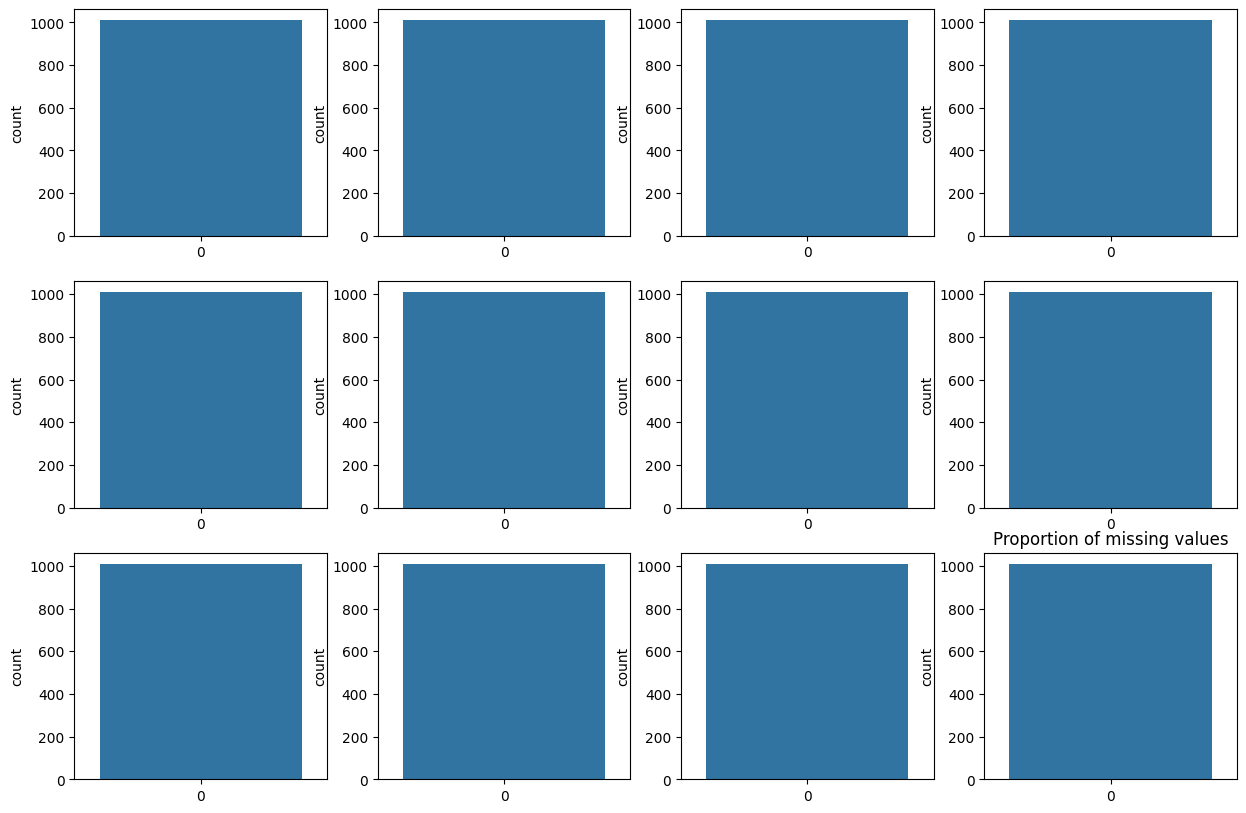

In [15]:
missing_cols = ["built_year","floors","bedroom","bathroom","road_access","property_face","state","district","city","area","area_sq_ft","amount"]

fig, axes = plt.subplots(3,4,figsize=(15,10))

for i,col in enumerate(missing_cols):
    sns.countplot(missing_df[col],ax=axes[int(i/4),int(i % 4)])
    
plt.title("Proportion of missing values")

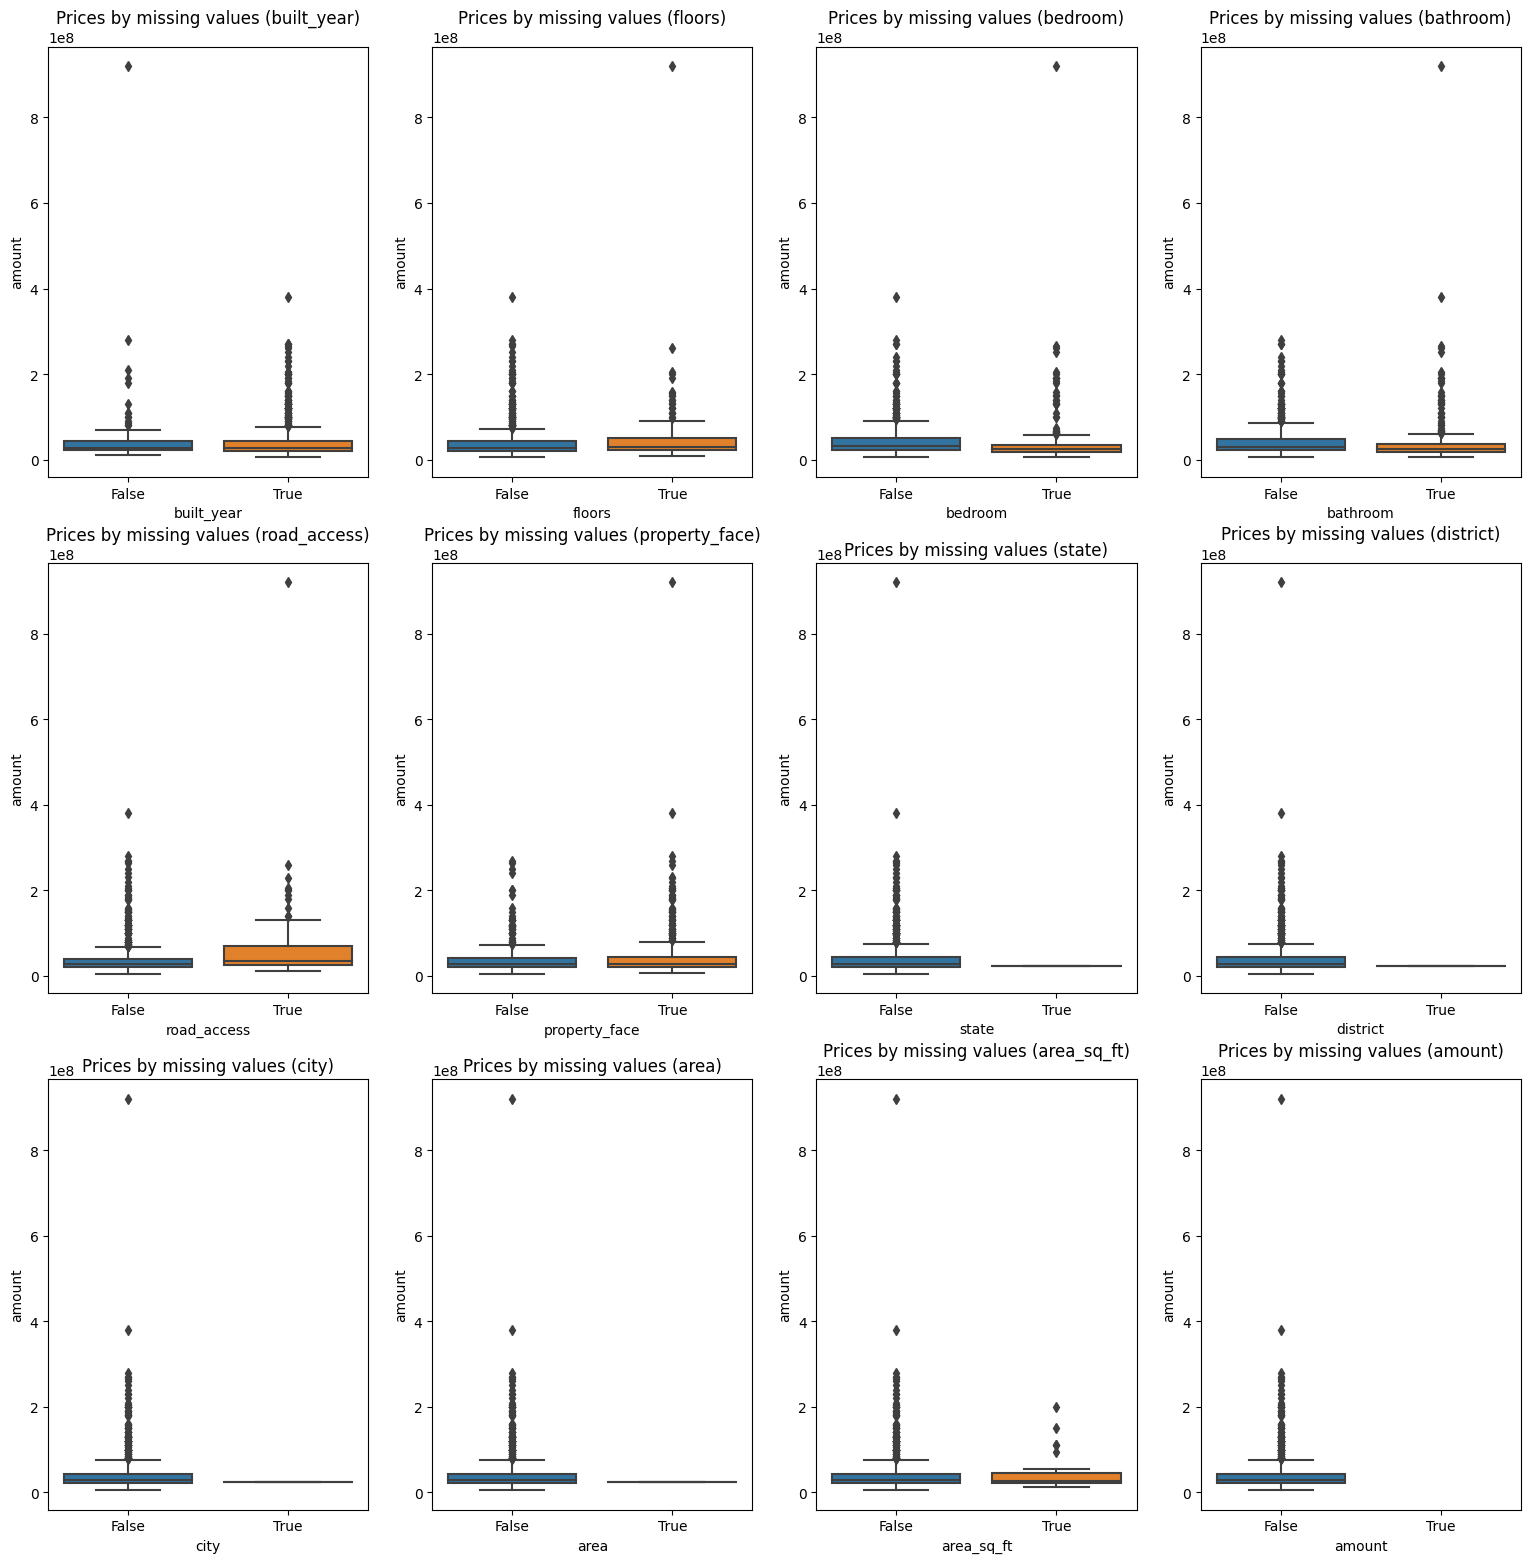

In [16]:
fig, axes = plt.subplots(3,4,figsize=(19,19))

for i,col in enumerate(missing_cols):
    axes[int(i/4),int(i % 4)].title.set_text("Prices by missing values ({})".format(col))
    sns.boxplot(x=missing_df[col],y=df.amount,ax=axes[int(i/4),int(i % 4)])

## Univariate Analysis

array([[<AxesSubplot: title={'center': 'built_year'}>,
        <AxesSubplot: title={'center': 'floors'}>,
        <AxesSubplot: title={'center': 'bedroom'}>],
       [<AxesSubplot: title={'center': 'bathroom'}>,
        <AxesSubplot: title={'center': 'road_access'}>,
        <AxesSubplot: title={'center': 'area_sq_ft'}>],
       [<AxesSubplot: title={'center': 'amount'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

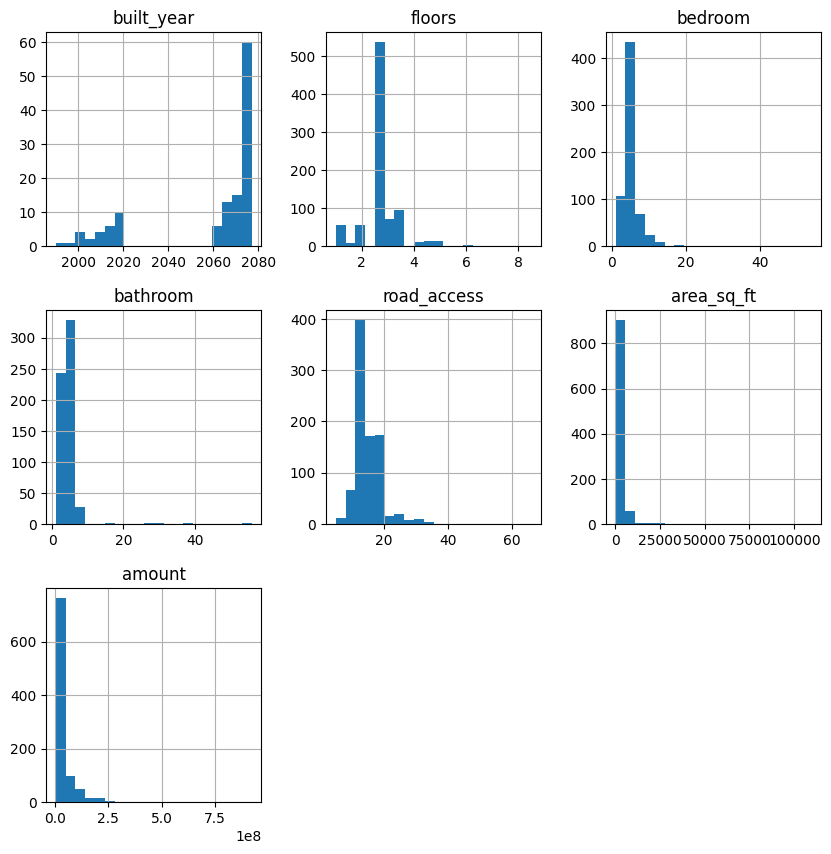

In [17]:
# Numerical
df.select_dtypes(include=np.number).hist(bins=20,figsize=(10,10))

- The distribution are skewed to right. ( Either handle extreme values or do transformations like log normal )
- Most houses are having 2.5 floors

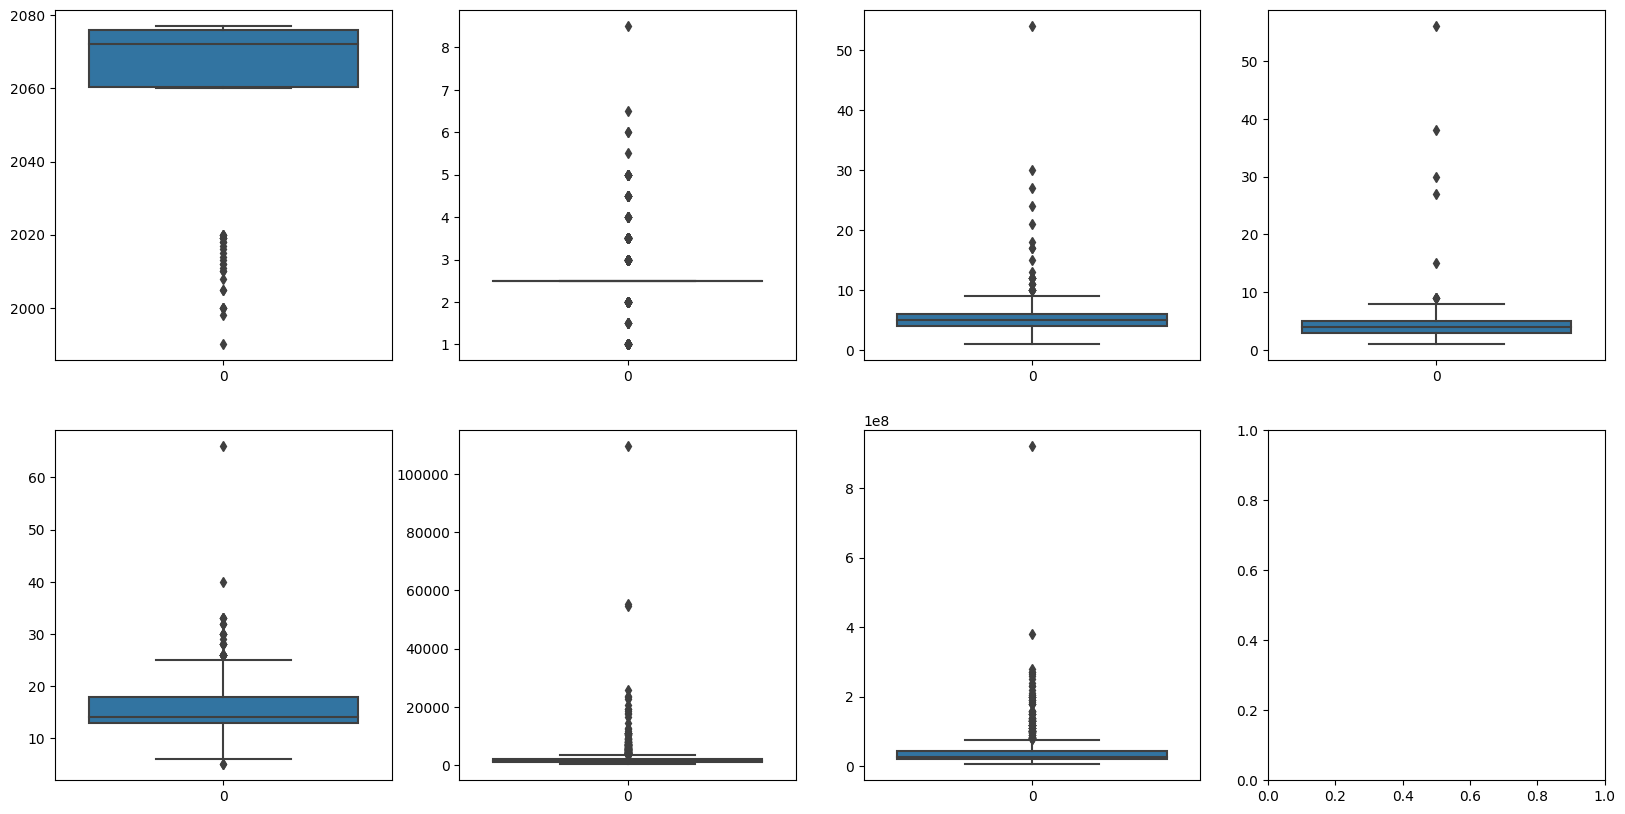

In [18]:
num = df.select_dtypes(include=np.number).columns

fig, axes = plt.subplots(2,4,figsize=(20,10))

for i,col in enumerate(num):
    sns.boxplot(df[col],ax=axes[int(i/4),int(i % 4)])

ValueError: could not convert string to float: 'Per Aana'

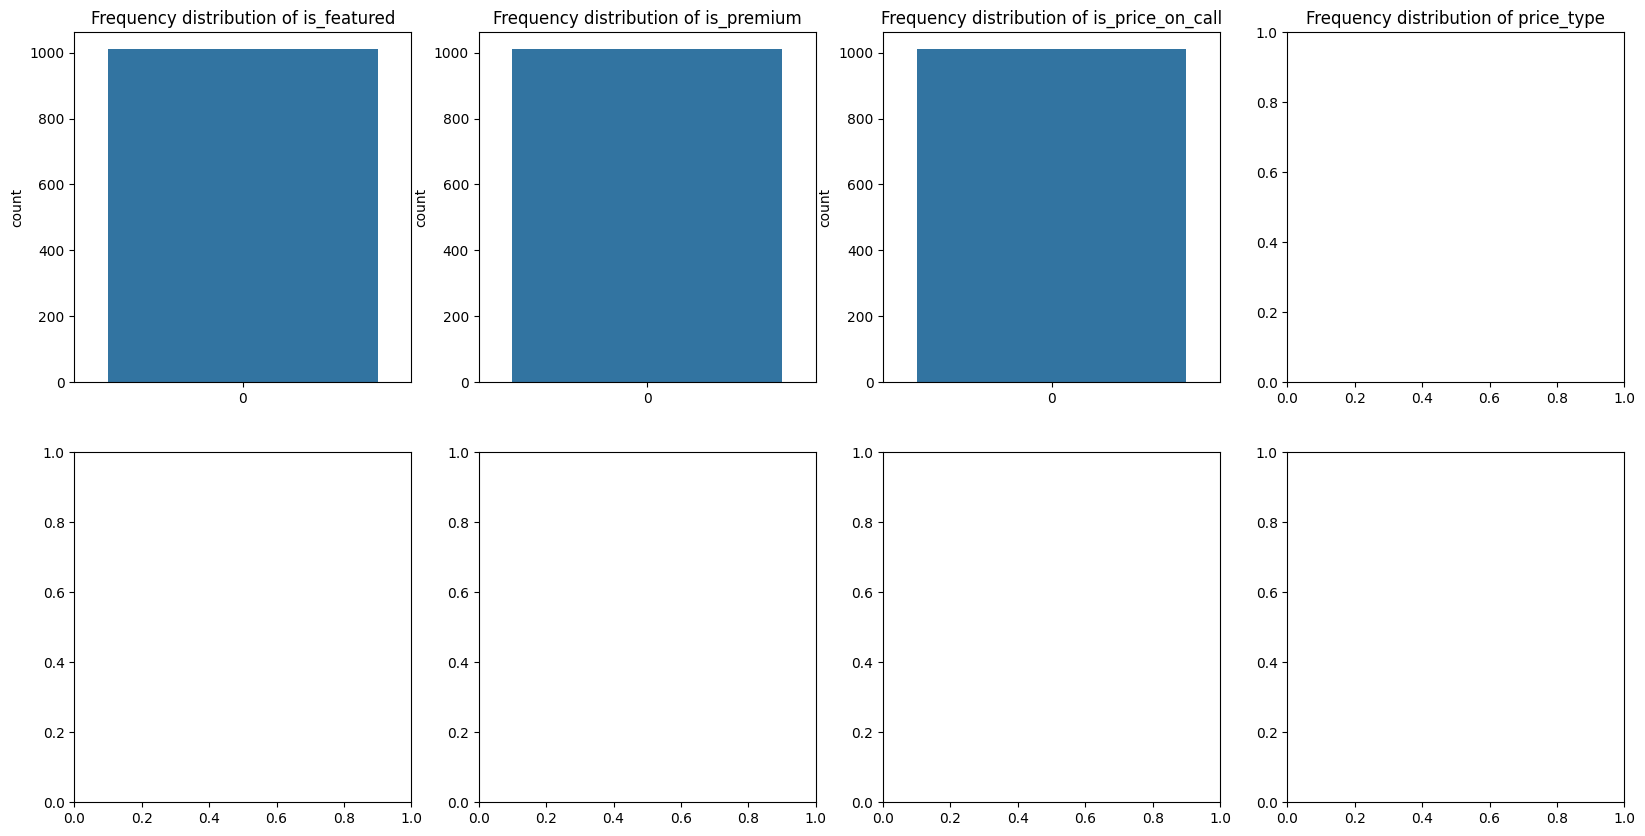

In [19]:
# Categorical
categorical = ['is_featured', 'is_premium', 'is_price_on_call',
       'price_type', 'property_face', 'state', 'district', 'city']
fig, axes = plt.subplots(2,4,figsize=(20,10))

for i,col in enumerate(categorical):
    axes[int(i/4),int(i % 4)].title.set_text("Frequency distribution of {}".format(col))
    sns.countplot(df[col],ax=axes[int(i/4),int(i % 4)])

## Multivariate Analysis

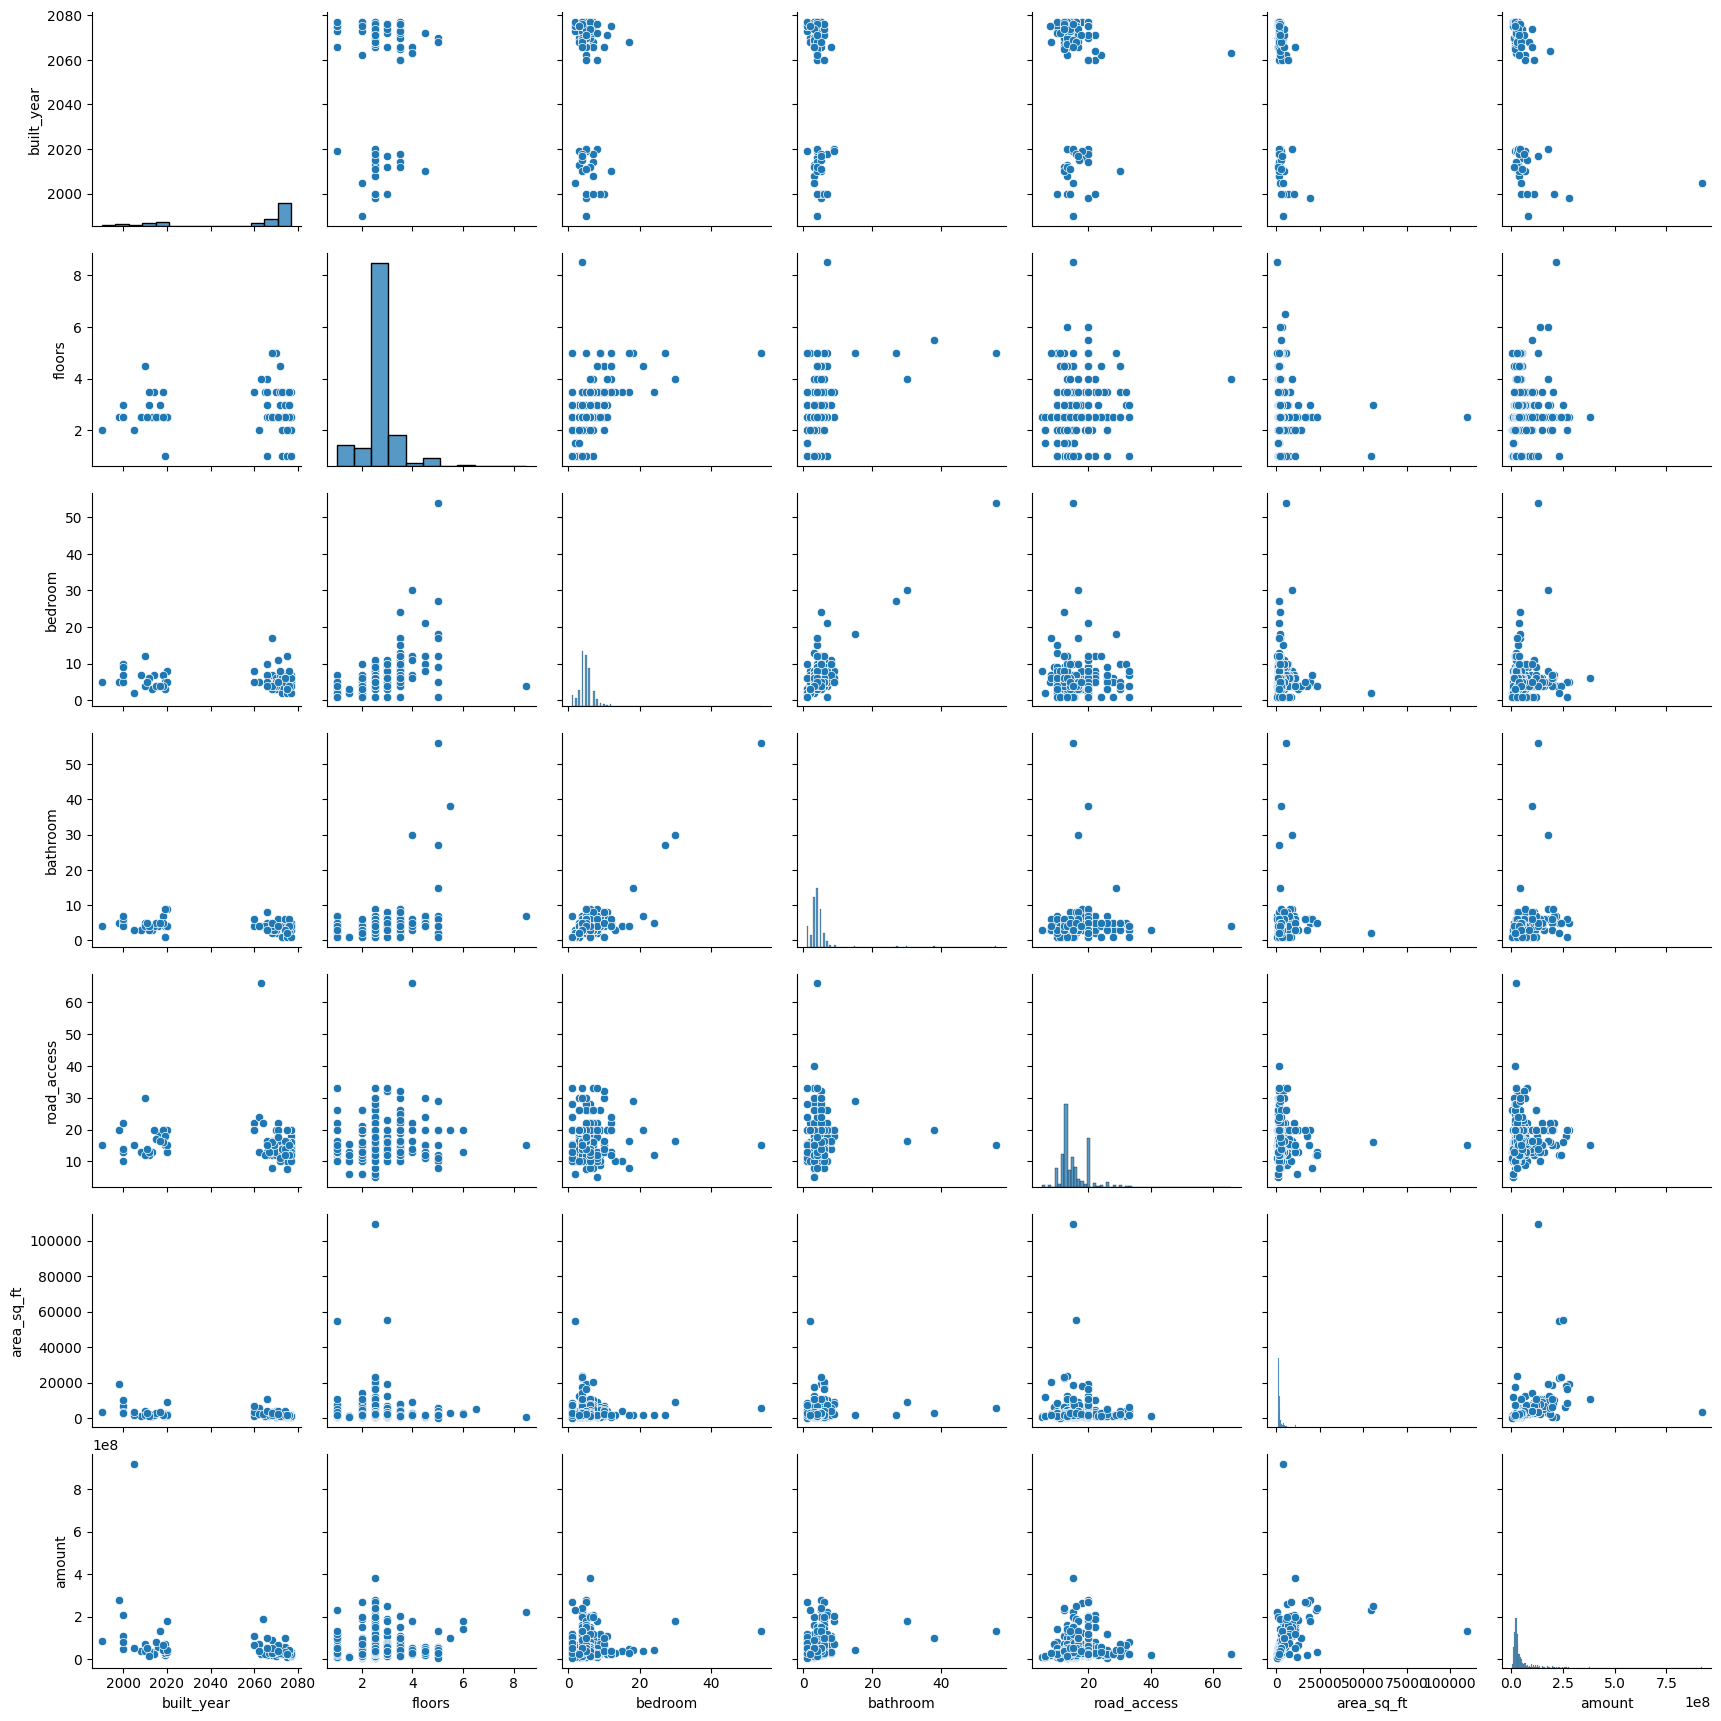

In [21]:
sns.pairplot(df.select_dtypes(include=np.number))

<AxesSubplot: >

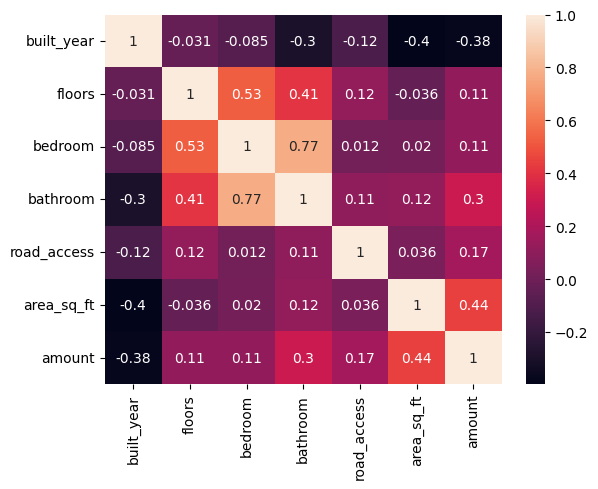

In [22]:
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)

1. Area is the most correlated feature with price
2. Multicollinearity with no. of bathroom and no. of bedroom, floors and bedroom, floors and bathroom

Text(0.5, 1.0, 'Median house price by district')

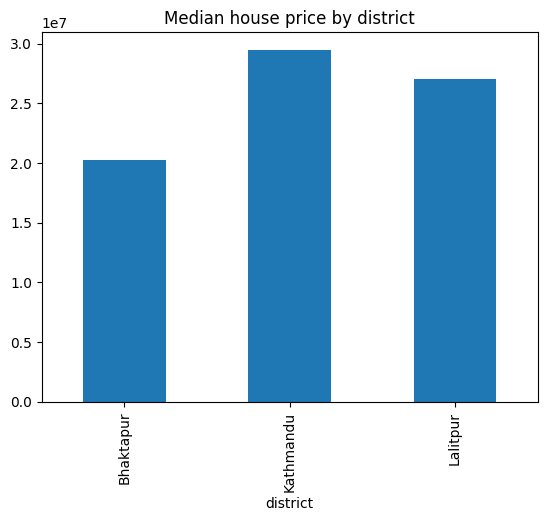

In [23]:
df.groupby("district").median()["amount"].plot(kind="bar")
plt.title("Median house price by district")

Text(0.5, 1.0, 'Median house price by City')

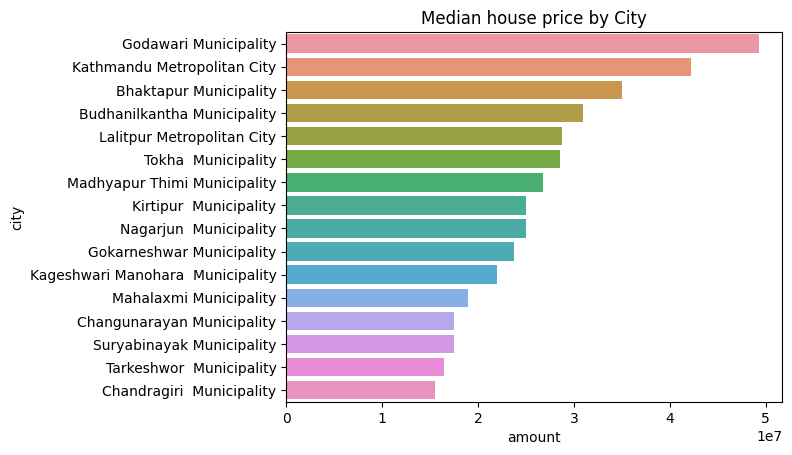

In [24]:
sns.barplot(data=df.groupby("city").median().reset_index().sort_values("amount",ascending=False),x="amount",y="city",orient="h")
plt.title("Median house price by City")

Text(0.5, 1.0, 'Median house price by Property Face')

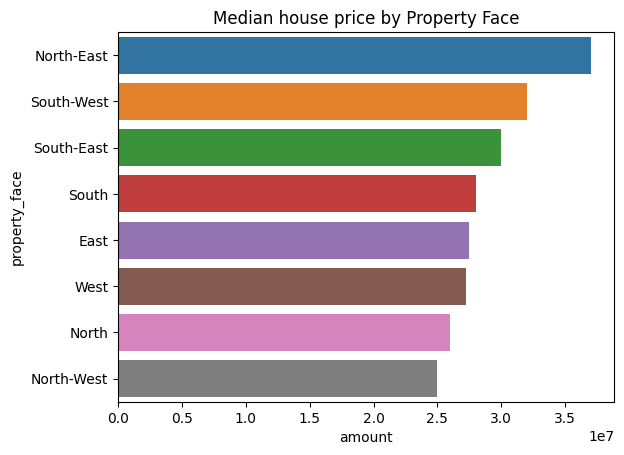

In [25]:
sns.barplot(data=df.groupby("property_face").median().reset_index().sort_values("amount",ascending=False),x="amount",y="property_face",orient="h")
plt.title("Median house price by Property Face")

Text(0.5, 1.0, 'Median house price by No. of Floor')

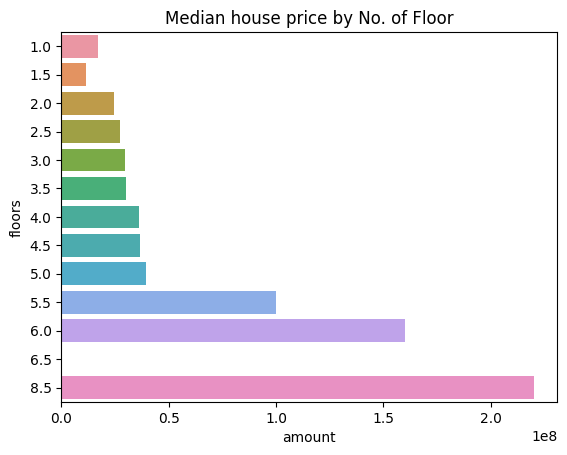

In [26]:
sns.barplot(data=df.groupby("floors").median().reset_index(),x="amount",y="floors",orient="h")
plt.title("Median house price by No. of Floor")

Text(0.5, 1.0, 'Median house price by No. of Bedroom')

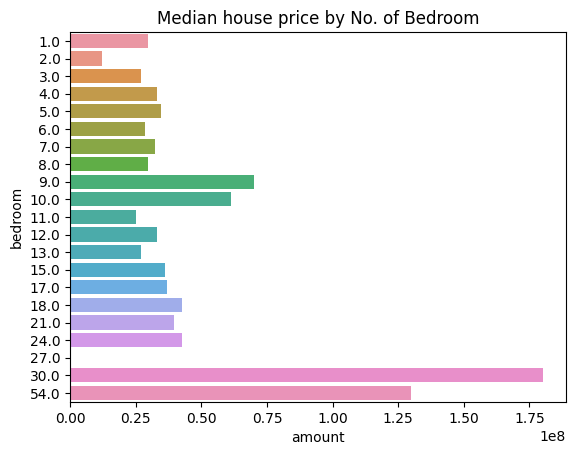

In [27]:
sns.barplot(data=df.groupby("bedroom").median().reset_index(),x="amount",y="bedroom",orient="h")
plt.title("Median house price by No. of Bedroom")

Text(0.5, 1.0, 'Median house price by Road access length')

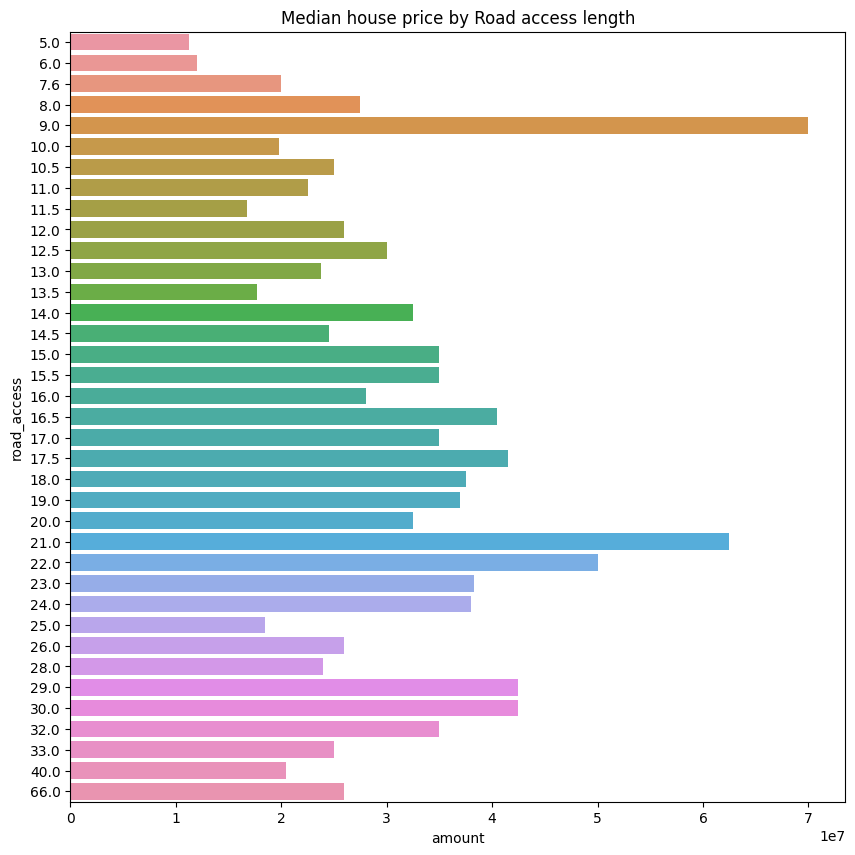

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(data=df.groupby("road_access").median().reset_index(),x="amount",y="road_access",orient="h")
plt.title("Median house price by Road access length")

In [29]:
df.groupby(["district","floors"]).median()

built_year  is_featured  is_premium  bedroom  bathroom  \
district  floors                                                           
Bhaktapur 1.0            NaN          0.0         0.0      2.0       1.0   
          2.0            NaN          0.0         0.0      3.5       2.0   
          2.5         2071.5          0.0         0.0      5.0       3.0   
          3.0         2075.0          0.0         0.0      6.0       3.0   
          3.5         2012.0          0.0         0.0      9.0       4.0   
          4.0            NaN          0.0         0.0     11.5       5.0   
          4.5            NaN          0.0         0.0     16.5       5.5   
Kathmandu 1.0         2075.0          0.0         0.0      2.0       1.0   
          1.5            NaN          0.0         0.0      2.0       1.0   
          2.0         2068.5          0.0         0.0      4.0       3.0   
          2.5         2071.0          0.0         0.0      5.0       4.0   
          3.0         2069.0          0.0         0.0      6.0       4.0   
          3.5         2070.0          0.0         0.0      7.0       4.0   
          4.0         2063.0          0.0         0.0     18.0       4.5   
          4.5         2041.0          0.0         0.0     11.0       5.0   
          5.0         2069.0          0.0         0.0      9.0       4.0   
          5.5            NaN          0.0         0.0      NaN      38.0   
          6.0            NaN          0.0         0.0      NaN       NaN   
          6.5            NaN          0.0         0.0      NaN       NaN   
          8.5            NaN          0.0         0.0      4.0       7.0   
Lalitpur  1.0         2073.0          0.0         0.0      2.0       2.0   
          1.5            NaN          0.0         0.0      3.0       1.0   
          2.0         2074.5          0.0         0.0      4.0       3.5   
          2.5         2077.0          0.0         0.0      4.0       4.0   
          3.0            NaN          0.0         0.0      6.0       5.0   
          3.5            NaN          0.0         0.0      7.5       4.0   
          4.0         2066.0          0.0         0.0      7.0       4.0   
          4.5            NaN          0.0         0.0      NaN       5.0   
          5.0            NaN          0.0         0.0     27.0      27.0   

                  road_access  area_sq_ft       amount  
district  floors                                        
Bhaktapur 1.0           13.00   1112.3100   12250000.0  
          2.0           13.00   1112.3100   13500000.0  
          2.5           16.50   1369.0000   20500000.0  
          3.0           17.25   1593.5950   20500000.0  
          3.5           20.00   1060.9750   22500000.0  
          4.0           17.50   1582.9050   32500000.0  
          4.5           16.50   1711.2450   37250000.0  
Kathmandu 1.0           13.00   1369.0000   18000000.0  
          1.5           13.00   1197.8700   11500000.0  
          2.0           15.00   1839.5900   25750000.0  
          2.5           13.00   1540.1200   28000000.0  
          3.0           13.00   1604.2900   29500000.0  
          3.5           13.00   1689.8500   31000000.0  
          4.0           18.25   2053.5000   45000000.0  
          4.5           15.00   1369.0000   42250000.0  
          5.0           17.50   1781.8375   39500000.0  
          5.5           20.00   2738.0000  100000000.0  
          6.0           16.50   2588.2650  160000000.0  
          6.5             NaN   5133.7500          NaN  
          8.5           15.00    556.1500  220000000.0  
Lalitpur  1.0           15.50   1732.6350   27000000.0  
          1.5            9.00    898.4000   11500000.0  
          2.0           14.00   1882.3700   29000000.0  
          2.5           15.00   1369.0000   26500000.0  
          3.0           14.50   1831.0350   60000000.0  
          3.5           12.00   1625.6850   28000000.0  
          4.0           13.00   1026.7500   27000000.0  
        

<AxesSubplot: xlabel='area_sq_ft', ylabel='amount'>

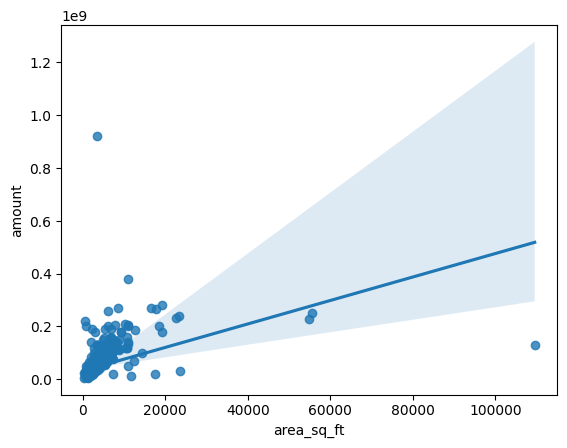

In [30]:
sns.regplot(data=df, x="area_sq_ft",y="amount")

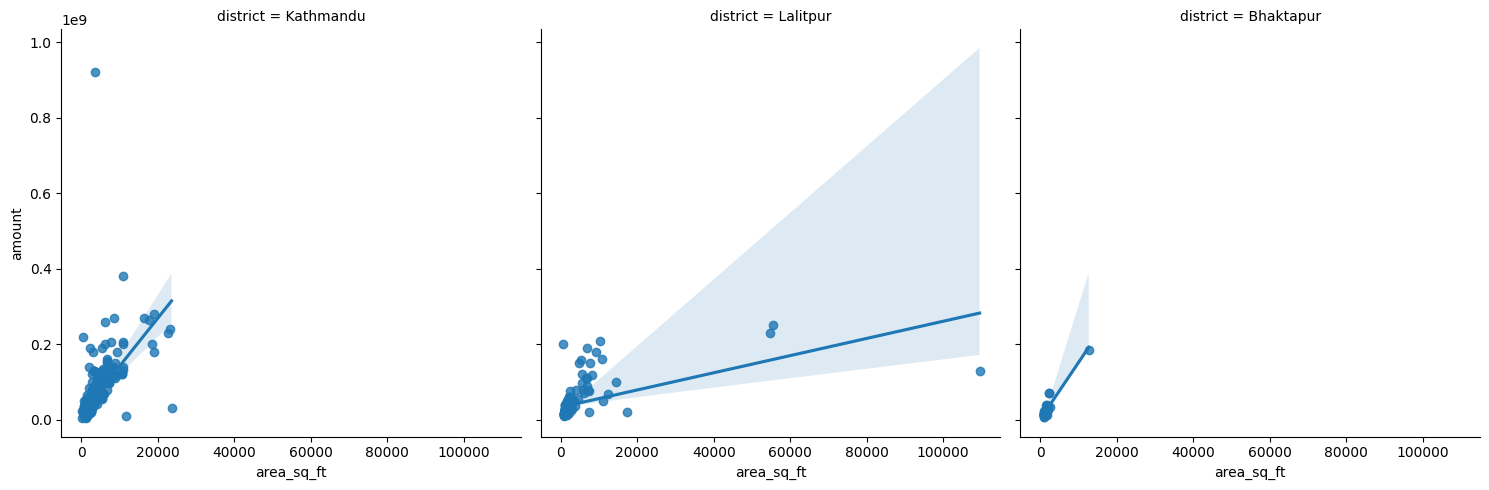

In [31]:
sns.lmplot(data=df,x="area_sq_ft", y="amount", col="district")

Text(0.5, 1.0, 'Area by district')

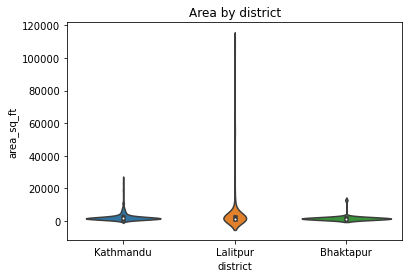

In [43]:
sns.violinplot(data=df,x="district",y="area_sq_ft")
plt.title("Area by district")

Text(0.5, 1.0, 'House Price by district')

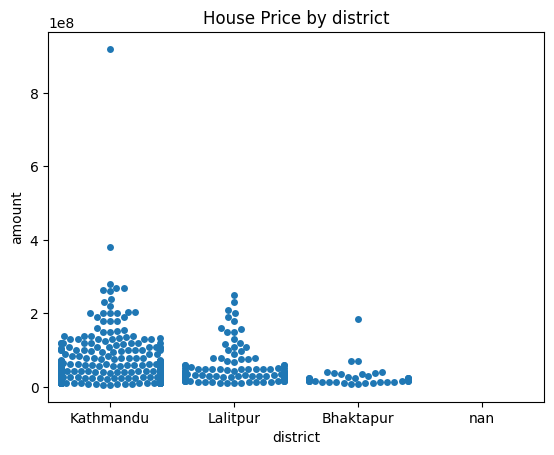

In [32]:
sns.swarmplot(data=df,x="district",y="amount")
plt.title("House Price by district")

Text(0.5, 1.0, 'No. of floors by district')

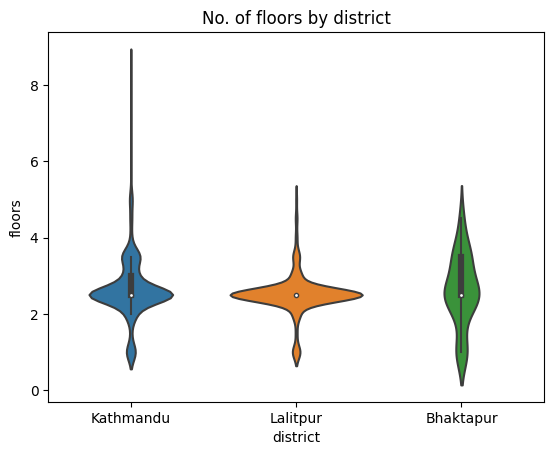

In [33]:
sns.violinplot(data=df,x="district",y="floors")
plt.title("No. of floors by district")

Lalitpur mostly have houses with 2.5 floors

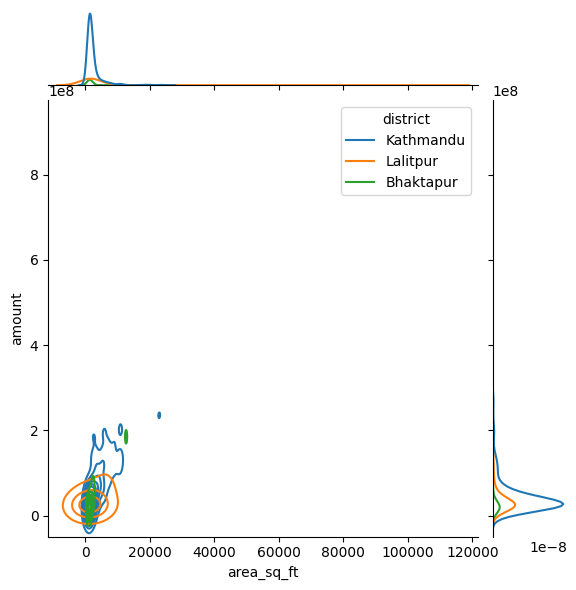

In [34]:
sns.jointplot(data=df, x="area_sq_ft", y="amount", hue="district", kind="kde")

In [36]:
def cloud(df,col):
    '''
        ref : https://www.geeksforgeeks.org/generating-word-cloud-python/
    '''
    comment_words = '' 
    stopwords = set(STOPWORDS) 

    # iterate through the csv file 
    for val in df[col]: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

In [37]:
cloud(df,"title")

NameError: name 'STOPWORDS' is not defined

In [38]:
df["is_bunglow"] = df.title.apply(lambda x: "bungalow" in x.lower())

<AxesSubplot: xlabel='is_bunglow', ylabel='amount'>

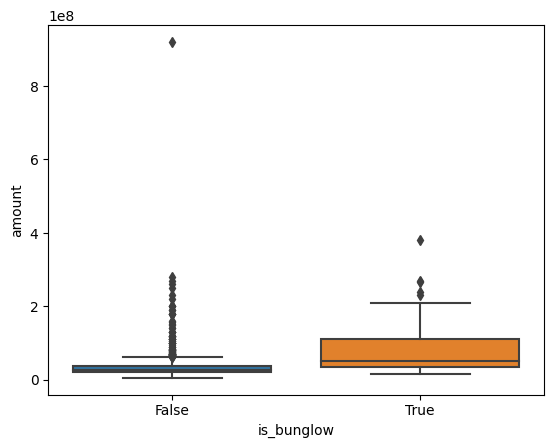

In [39]:
sns.boxplot(data=df, x="is_bunglow",y="amount")

In [40]:
df["is_commercial"] = df.title.apply(lambda x: "commercial" in x.lower())

<AxesSubplot: xlabel='is_commercial', ylabel='amount'>

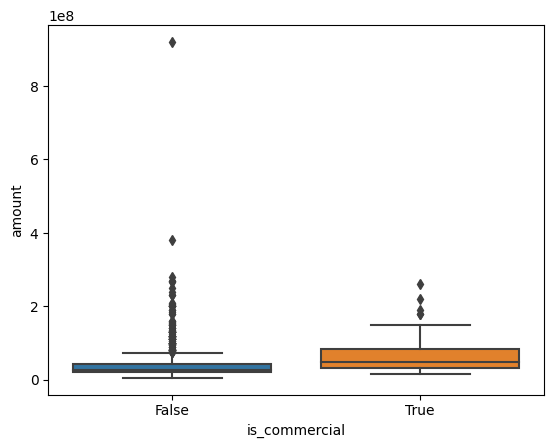

In [41]:
sns.boxplot(data=df, x="is_commercial",y="amount")

<AxesSubplot: xlabel='is_new', ylabel='amount'>

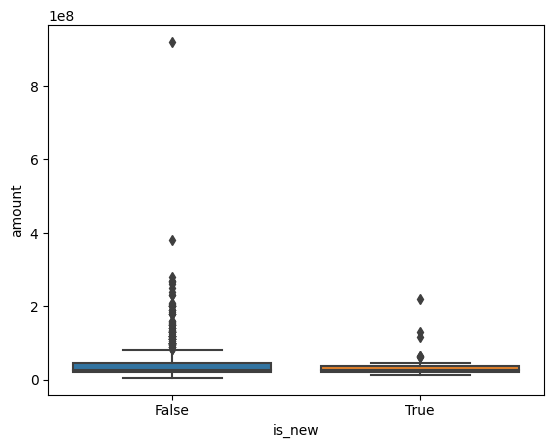

In [42]:
df["is_new"] = df.title.apply(lambda x: "new" in x.lower())
sns.boxplot(data=df, x="is_new",y="amount")

<AxesSubplot: xlabel='is_commercial', ylabel='amount'>

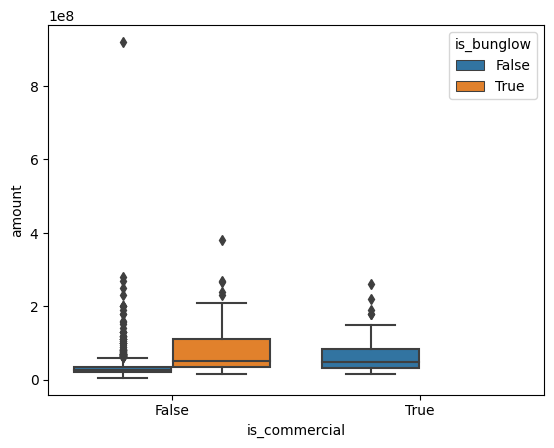

In [43]:
sns.boxplot(data=df, x="is_commercial",y="amount",hue="is_bunglow")

<AxesSubplot: xlabel='is_bunglow', ylabel='area_sq_ft'>

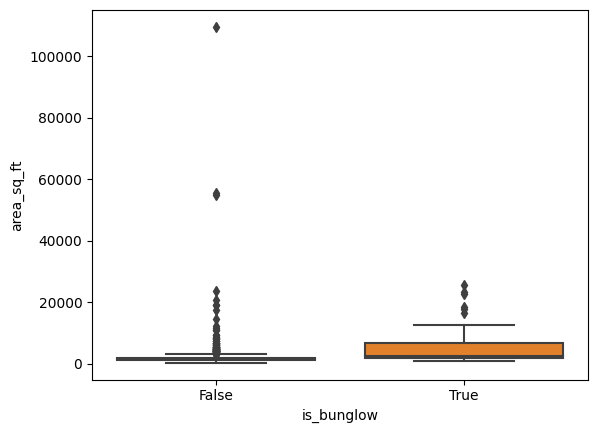

In [44]:
sns.boxplot(data=df, x="is_bunglow",y="area_sq_ft")

<AxesSubplot: xlabel='is_premium', ylabel='amount'>

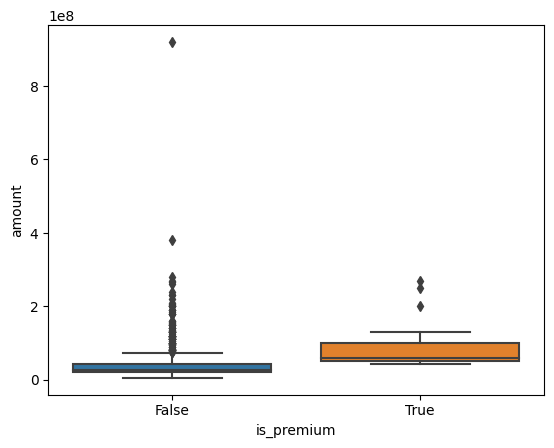

In [45]:
sns.boxplot(data=df, x="is_premium",y="amount")

<AxesSubplot: xlabel='property_face', ylabel='district'>

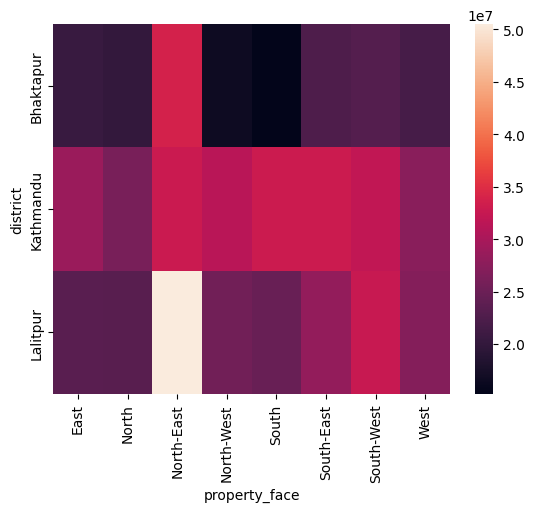

In [46]:
district_face_pivot = pd.pivot_table(df, values='amount', index="district",columns="property_face", aggfunc=np.median)
sns.heatmap(district_face_pivot)

In [47]:
df.groupby(["district","property_face"]).agg(["count","median"])["amount"]

count      median
district  property_face                   
Bhaktapur East               6  20500000.0
          North              3  20000000.0
          North-East         2  33750000.0
          North-West         1  16500000.0
          South              6  15250000.0
          South-East         1  22500000.0
          South-West         1  23000000.0
          West               6  21750000.0
Kathmandu East              82  28750000.0
          North             42  26000000.0
          North-East        22  32750000.0
          North-West        16  31250000.0
          South             55  33000000.0
          South-East        36  33000000.0
          South-West        22  32000000.0
          West              48  27500000.0
Lalitpur  East              21  23500000.0
          North             20  23250000.0
          North-East         8  50500000.0
          North-West         8  25500000.0
          South             22  24750000.0
          South-East        12  28250000.0
          South-West         5  32500000.0
          West              12  27000000.0

<AxesSubplot: xlabel='property_face', ylabel='district'>

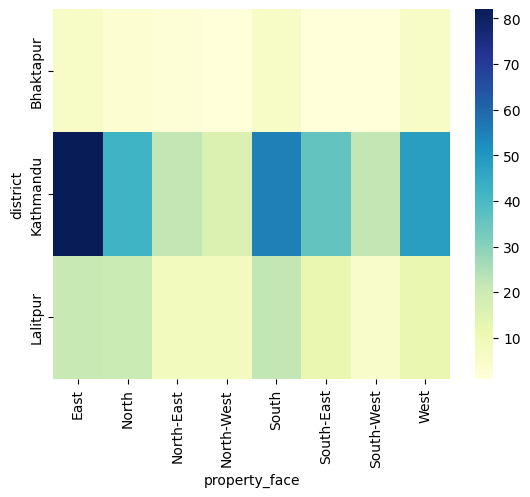

In [48]:
district_face_pivot_count = pd.pivot_table(df, values='amount', index="district",columns="property_face", aggfunc="count")
sns.heatmap(district_face_pivot_count,cmap="YlGnBu")